In [4]:
import rasterio
from pathlib import Path
import scipy

In [2]:
fn = Path(r"c:\Users\jpeacock\OneDrive - DOI\ArcGIS\westcoast_etopo.tiff")

In [15]:
with rasterio.open(fn) as src:
    profile = src.profile
    data = src.read(1)

In [16]:
smoothed_data = scipy.ndimage.uniform_filter(data, size=31)


In [29]:

smoothed_data = scipy.ndimage.gaussian_filter(data, sigma=20)


In [30]:
profile.update(dtype=rasterio.float32)

In [31]:
with rasterio.open(fn.parent.joinpath("average_topography_g20.tif"), "w", **profile) as dst:
    dst.write(smoothed_data.astype(rasterio.float32), 1)

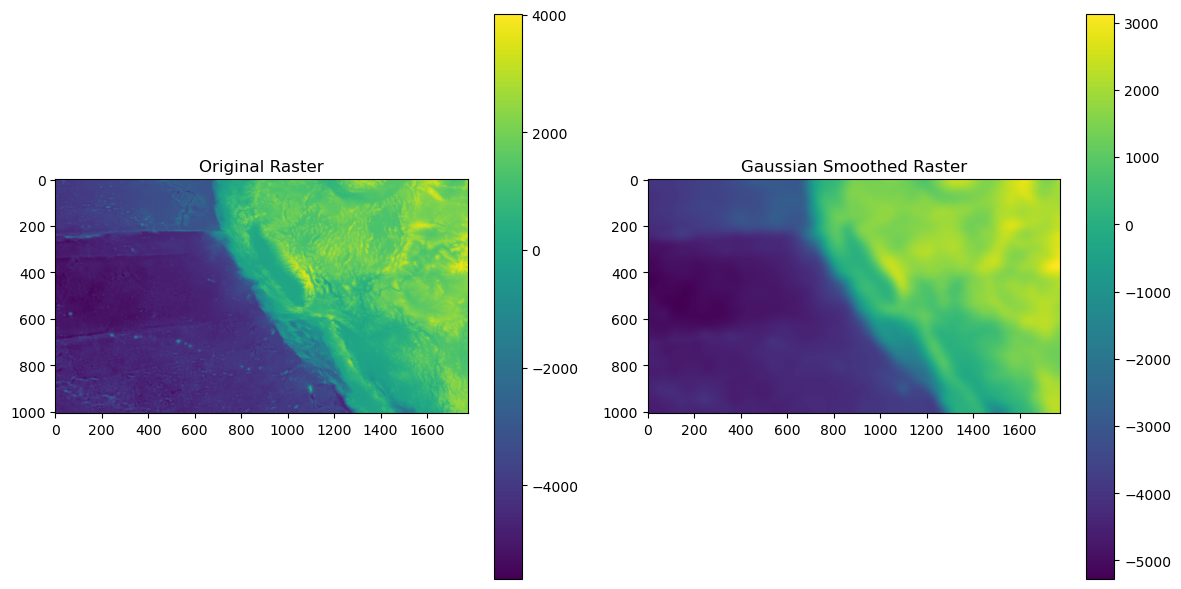

In [32]:
import matplotlib.pyplot as plt
import rasterio
from scipy.ndimage import gaussian_filter


# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.set_title('Original Raster')
img1 = ax1.imshow(data, cmap='viridis')
fig.colorbar(img1, ax=ax1, orientation='vertical')

ax2.set_title('Gaussian Smoothed Raster')
img2 = ax2.imshow(smoothed_data, cmap='viridis')
fig.colorbar(img2, ax=ax2, orientation='vertical')

plt.tight_layout()
plt.show()


Masked raster saved to c:\Users\jpeacock\OneDrive - DOI\ArcGIS\average_topography_g20_masked.tif


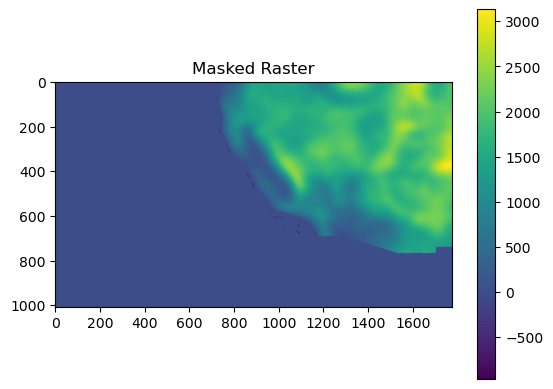

In [33]:
import rasterio
from rasterio.mask import mask
import fiona
import matplotlib.pyplot as plt

# Paths
raster_path = fn.parent.joinpath("average_topography_g20.tif")
shapefile_path = Path(r"c:\Users\jpeacock\OneDrive - DOI\ArcGIS\cb_2018_us_nation_5m.shp")
masked_output_path = fn.parent.joinpath("average_topography_g20_masked.tif")

# Step 1: Read the shapefile geometry
with fiona.open(shapefile_path, 'r') as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

# Step 2: Mask the raster
with rasterio.open(raster_path) as src:
    out_image, out_transform = mask(src, shapes, crop=True)
    out_meta = src.meta.copy()

# Step 3: Update metadata and save the masked raster
out_meta.update({
    "driver": "GTiff",
    "height": out_image.shape[1],
    "width": out_image.shape[2],
    "transform": out_transform
})

with rasterio.open(masked_output_path, "w", **out_meta) as dest:
    dest.write(out_image)

print(f"Masked raster saved to {masked_output_path}")



plt.imshow(out_image[0], cmap='viridis')
plt.title("Masked Raster")
plt.colorbar()
plt.show()
